# SemEval 2024 task ECAC - EDA

## Load data

### Utterances JSON

In [3]:
import json


# load json
with open('data/Subtask_2_train.json') as f:
    text_data = json.load(f)

text_data[0]

{'conversation_ID': 1,
 'conversation': [{'utterance_ID': 1,
   'text': 'Alright , so I am back in high school , I am standing in the middle of the cafeteria , and I realize I am totally naked .',
   'speaker': 'Chandler',
   'emotion': 'neutral',
   'video_name': 'dia1utt1.mp4'},
  {'utterance_ID': 2,
   'text': 'Oh , yeah . Had that dream .',
   'speaker': 'All',
   'emotion': 'neutral',
   'video_name': 'dia1utt2.mp4'},
  {'utterance_ID': 3,
   'text': 'Then I look down , and I realize there is a phone ... there .',
   'speaker': 'Chandler',
   'emotion': 'surprise',
   'video_name': 'dia1utt3.mp4'},
  {'utterance_ID': 4,
   'text': 'Instead of ... ?',
   'speaker': 'Joey',
   'emotion': 'surprise',
   'video_name': 'dia1utt4.mp4'},
  {'utterance_ID': 5,
   'text': 'That is right .',
   'speaker': 'Chandler',
   'emotion': 'anger',
   'video_name': 'dia1utt5.mp4'},
  {'utterance_ID': 6,
   'text': 'Never had that dream .',
   'speaker': 'Joey',
   'emotion': 'neutral',
   'video_nam

### Load video and display it

In [26]:
def vid_path(filename):
    return f'./data/train_videos_1/{filename}'

# load mp4 video
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_video(filename):
    cap = cv2.VideoCapture(filename)
    frames = []
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    cap.release()
    return np.array(frames)

Sorry I am late , I was stuck at work . There was this big dinosaur ... thing ... anyway .


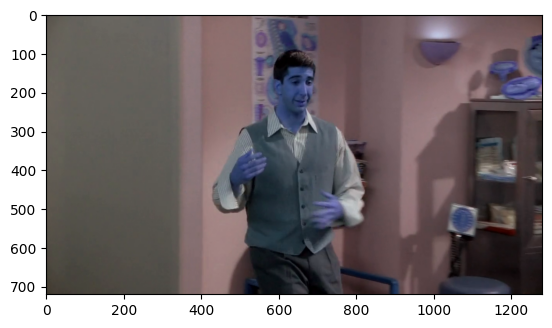

In [61]:
vid_no, utt_no = 8, 1

utt = text_data[vid_no-1]['conversation'][utt_no-1]
vid = load_video(vid_path(utt['video_name']))

print(utt['text'])
# plt.imshow(vid[0])
# plt.imshow(vid[len(vid)//2])
# plt.imshow(vid[-1])

## Analyze utterances file

In [3]:
print("Ilość konwersacji", len(text_data))

utt_counts = []
emotions = []
characters_in_convs = []
for i in range(len(text_data)):
    conv = text_data[i]['conversation']

    utt_counts.append(len(conv))

    characters = set()
    for j in range(len(conv)):
        emotions.append(conv[j]['emotion'])
        characters.add(conv[j]['speaker'])
    characters_in_convs.append(characters)

print("Fragmenty konwersacji:")
print("  Ilość: ", sum(utt_counts))
print("  Średnia: ", sum(utt_counts)/len(utt_counts))
print("  Mediana: ", sorted(utt_counts)[len(utt_counts)//2])
print("  Max: ", max(utt_counts))
print("  Min: ", min(utt_counts))

print("Emocje:")
print({x:emotions.count(x) for x in set(emotions)})

print("Postacie:")
character_counts = [len(x) for x in characters_in_convs]
print("  Średnia: ", sum(character_counts)/len(character_counts))
print("  Min: ", min(character_counts))
print("  Max: ", max(character_counts))
print("  Ilość konwersacji z 1 postacią: ", character_counts.count(1))
print("  Ilość konwersacji z 9 postaciami: ", character_counts.count(9))

Ilość konwersacji 1374
Fragmenty konwersacji:
  Ilość:  13619
  Średnia:  9.91193595342067
  Mediana:  9
  Max:  33
  Min:  1
Emocje:
{'sadness': 1147, 'anger': 1615, 'neutral': 5929, 'surprise': 1840, 'disgust': 414, 'fear': 373, 'joy': 2301}
Postacie:
  Średnia:  2.7852983988355167
  Min:  1
  Max:  9
  Ilość konwersacji z 1 postacią:  78
  Ilość konwersacji z 9 postaciami:  1


In [6]:
print("  Postacie w konwersacjach (min, max):")
characters_in_convs.sort(key=len, reverse=True)
print(characters_in_convs[0])
print(characters_in_convs[-1])

  Postacie w konwersacjach (min, max):
{'Joey', 'Monica', 'Rachel', 'Phoebe', 'Mr. Geller', 'Chandler', 'Mrs. Geller', 'Ross', 'All'}
{'Ross'}


In [44]:
emotions = ['sadness', 'anger', 'neutral', 'surprise', 'disgust', 'fear', 'joy']
# utt_word_lens, utt_char_lens = dict([e: [] for e in emotions]), dict([e: [] for e in emotions])
utt_word_lens, utt_char_lens = {e: [] for e in emotions}, {e: [] for e in emotions}

for i in range(len(text_data)):
    conv = text_data[i]['conversation']

    for j in range(len(conv)):
        e = conv[j]['emotion']
        
        utt_word_lens[e].append(len(conv[j]['text'].split()))
        # append a list of char lens for each word
        utt_char_lens[e].extend([len(w) for w in conv[j]['text'].split()])

    characters_in_convs.append(characters)

emotion_stats = {e: {
                    'word': {'avg': sum(utt_word_lens[e])/len(utt_word_lens[e]),
                             'max': max(utt_word_lens[e]), 
                             'min': min(utt_word_lens[e])},
                    'char': {'avg': sum(utt_char_lens[e])/len(utt_char_lens[e]),
                             'max': max(utt_char_lens[e]),
                             'min': min(utt_char_lens[e])}} 
                for e in emotions}

print("Statystyki długości wypowiedzi:")
for e, stat in emotion_stats.items():
    print("\n")
    print(e)
    print("number of words: ", stat['word'])
    print("length of words: ",stat['char'])

Statystyki długości wypowiedzi:


sadness
number of words:  {'avg': 13.833478639930252, 'max': 54, 'min': 1}
length of words:  {'avg': 3.0821201235268165, 'max': 14, 'min': 1}


anger
number of words:  {'avg': 13.06749226006192, 'max': 60, 'min': 1}
length of words:  {'avg': 3.1383150113722516, 'max': 14, 'min': 1}


neutral
number of words:  {'avg': 10.8105920053972, 'max': 62, 'min': 1}
length of words:  {'avg': 3.1650805042436345, 'max': 17, 'min': 1}


surprise
number of words:  {'avg': 8.884239130434782, 'max': 39, 'min': 1}
length of words:  {'avg': 3.0126628739218204, 'max': 25, 'min': 1}


disgust
number of words:  {'avg': 13.698067632850242, 'max': 48, 'min': 2}
length of words:  {'avg': 3.1927349673778873, 'max': 13, 'min': 1}


fear
number of words:  {'avg': 13.136729222520108, 'max': 44, 'min': 1}
length of words:  {'avg': 2.9010204081632653, 'max': 16, 'min': 1}


joy
number of words:  {'avg': 10.93263798348544, 'max': 78, 'min': 1}
length of words:  {'avg': 3.075608204802

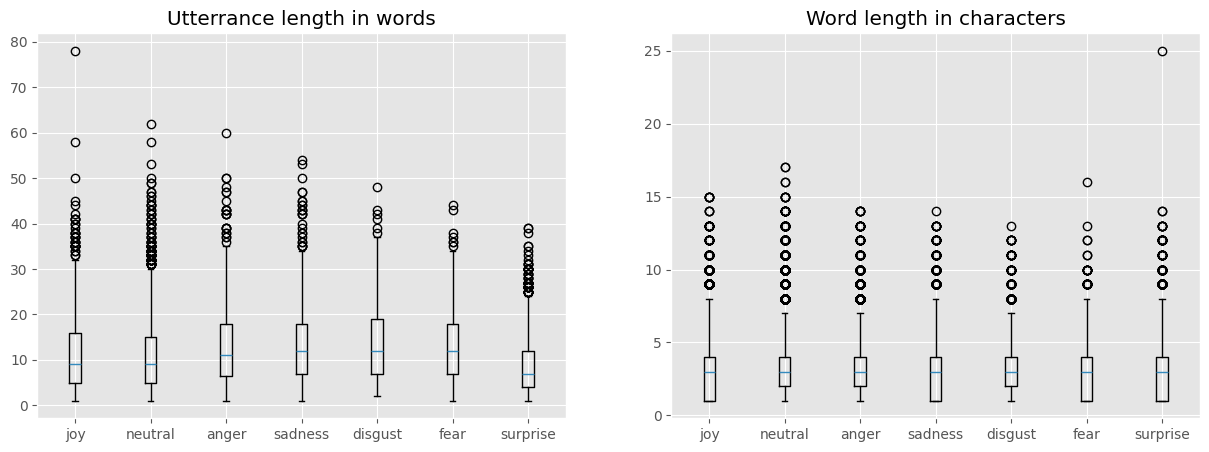

In [51]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

emotion_stats_items = emotion_stats.items()
# sort emotions decresing from the longest max utterance length in words
emotion_stats_items = sorted(emotion_stats_items, key=lambda x: x[1]['word']['max'], reverse=True)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].set_title('Utterrance length in words')
axs[1].set_title('Word length in characters')

for i, (e, stat) in enumerate(emotion_stats_items):
    # axs[0].violinplot(utt_word_lens[e], positions=[i], showmedians=True)
    # axs[1].violinplot(utt_char_lens[e], positions=[i], showmedians=True)

    axs[0].boxplot(utt_word_lens[e], positions=[i])
    axs[1].boxplot(utt_char_lens[e], positions=[i])

    axs[0].set_xticks(range(len(emotions)))
    axs[0].set_xticklabels(emotions)
    axs[1].set_xticks(range(len(emotions)))
    axs[1].set_xticklabels(emotions)

plt.show()

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AlexTerentowicz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

emotions = ['sadness', 'anger', 'neutral', 'surprise', 'disgust', 'fear', 'joy']
docs = ['' for _ in range(len(emotions))]

for i in range(len(text_data)):
    conv = text_data[i]['conversation']
    for j in range(len(conv)):
        e = conv[j]['emotion']
        docs[emotions.index(e)] += conv[j]['text'] + ' '

vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), sublinear_tf=True)
tfidf_matrix = vectorizer.fit_transform(docs)

idf_values = vectorizer.idf_
amplified_idf = np.power(idf_values, 3)
tfidf_matrix = tfidf_matrix.multiply(amplified_idf).tocsr()

feature_names = vectorizer.get_feature_names_out()

top_n = 10
for i, emotion in enumerate(emotions):
    print(f"\nTop {top_n} words for '{emotion}':")
    tfidf_scores = tfidf_matrix[i].toarray()[0]
    top_indices = np.argsort(tfidf_scores)[-top_n:]
    top_words = [f"{feature_names[idx]}: {tfidf_scores[idx]:.4f}" for idx in reversed(top_indices)]
    # top_words = [f"{feature_names[idx]}" for idx in reversed(top_indices)]
    print(top_words)


Top 10 words for 'sadness':
['complicated: 0.7288', '28: 0.5880', 'lens: 0.5880', 'unfortunate: 0.5880', 'bored: 0.5880', 'police: 0.5880', 'buried: 0.5880', 'failed: 0.5880', 'depressing: 0.5880', 'chris: 0.5880']

Top 10 words for 'anger':
['dammit: 0.6726', 'suggestion: 0.6726', 'cramp: 0.5915', 'bapstein: 0.5915', 'blame: 0.5915', 'oboe: 0.5915', 'iceberg: 0.4772', 'rapist: 0.4772', 'react: 0.4772', 'disturbing: 0.4772']

Top 10 words for 'neutral':
['la: 0.4897', 'actual: 0.4685', 'molly: 0.4440', 'boutros: 0.4440', 'robert: 0.4440', 'smelly: 0.4150', 'de: 0.4150', 'breathe: 0.4150', 'push: 0.4150', 'present: 0.3795']

Top 10 words for 'surprise':
['goodacre: 0.8381', 'oww: 0.7371', 'trapped: 0.5947', 'yikes: 0.5947', 'barley: 0.5947', 'deli: 0.5947', 'err: 0.5947', '717: 0.5947', 'actress: 0.5947', 'wha: 0.3979']

Top 10 words for 'disgust':
['eww: 1.0500', 'ewww: 1.0500', 'strangers: 0.8472', 'woowoo: 0.8472', 'hairy: 0.8472', 'capable: 0.8472', 'blah: 0.8472', 'awfully: 0.8472

In [12]:
!pip install gensim

  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
    --------------------------------------- 0.4/24.0 MB 11.6 MB/s eta 0:00:03
   ----- ---------------------------------- 3.5/24.0 MB 45.2 MB/s eta 0:00:01
   ----------- ---------------------------- 6.8/24.0 MB 62.6 MB/s eta 0:00:01
   ------------------- -------------------- 11.7/24.0 MB 81.8 MB/s eta 0:00:01
   ---------------------------- ----------- 17.0/24.0 MB 93.0 MB/s eta 0:00:01
   ------------------------------------- -- 22.3/24.0 MB 108.8 MB/s eta 0:00:01
   ---------------------------------------- 24.0/24.0 MB 81.8 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
   ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
   ---------------------------------------- 61.2/61.2 kB ? eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.0
    Uninstalling numpy-2.0.0:


  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
# run LDA for topic modeling of each emotion
import re
import gensim
import spacy
import gensim.corpora as corpora
from sklearn.decomposition import LatentDirichletAllocation
stop_words = stopwords.words('english')
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def preprocess_text(text):
    text = re.sub('\s+', ' ', text)  # Remove extra spaces
    text = re.sub('\S*@\S*\s?', '', text)  # Remove emails
    text = re.sub('\'', '', text)  # Remove apostrophes
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabet characters
    text = text.lower()  # Convert to lowercase
    return text

def tokenize(text):
    tokens = gensim.utils.simple_preprocess(text, deacc=True)
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

def lemmatize(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

preprocessed_texts = {e: [] for e in emotions}

for i in range(len(text_data)):
    conv = text_data[i]['conversation']
    for j in range(len(conv)):
        e = conv[j]['emotion']
        text = preprocess_text(conv[j]['text'])
        tokens = tokenize(text)
        lemmas = lemmatize(tokens)
        preprocessed_texts[e].append(lemmas)

for i, emotion in enumerate(emotions):

    lemmas = preprocessed_texts[emotion]

    id2word = corpora.Dictionary(lemmas)
    corpus = [id2word.doc2bow(text) for text in lemmas]

    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=3, 
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)
    
    topics = lda_model.print_topics(num_words=10)

    print(f"\nTopics for '{emotion}':")
    for topic in topics:
        print(topic)


<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\S'
C:\Users\AlexTerentowicz\AppData\Local\Temp\ipykernel_21696\778367420.py:11: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('\s+', ' ', text)  # Remove extra spaces
C:\Users\AlexTerentowicz\AppData\Local\Temp\ipykernel_21696\778367420.py:12: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('\S*@\S*\s?', '', text)  # Remove emails
C:\Users\AlexTerentowicz\AppData\Local\Temp\ipykernel_21696\778367420.py:11: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('\s+', ' ', text)  # Remove extra spaces
C:\Users\AlexTerentowicz\AppData\Local\Temp\ipykernel_21696\778367420.py:12: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('\S*@\S*\s?', '', text)  # Remove emails


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
# run LDA for topic modeling of all emotions

docs = ['' for _ in range(len(text_data))]

for i in range(len(text_data)):
    conv = text_data[i]['conversation']
    for j in range(len(conv)):
        docs[i] += conv[j]['text'] + ' '

vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), sublinear_tf=True)
tfidf_matrix = vectorizer.fit_transform(docs)

idf_values = vectorizer.idf_
amplified_idf = np.power(idf_values, 3)
tfidf_matrix = tfidf_matrix.multiply(amplified_idf).tocsr()

feature_names = vectorizer.get_feature_names_out()

n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda.fit(tfidf_matrix)

print(f"\nTopics for all emotions:")
for i in range(n_topics):
    print(f"\nTopic {i}:")
    topic_word_distributions = lda.components_[i]
    top_indices = np.argsort(topic_word_distributions)[-top_n:]
    top_words = [f"{feature_names[idx]}: {topic_word_distributions[idx]:.4f}" for idx in reversed(top_indices)]
    print(top_words)